In [1]:
!pip install gymnasium torch matplotlib numpy

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 13.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 48.8 MB/s  0:00:01m0:00:0100:01
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Usin

In [2]:
!pip install pandas

  Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


Episode: 0 Reward: -1000.0 Epsilon: 0.1
Episode: 1 Reward: -1000.0 Epsilon: 0.1
Episode: 2 Reward: -1000.0 Epsilon: 0.09996000000000001
Episode: 3 Reward: -1000.0 Epsilon: 0.09992000000000001
Episode: 4 Reward: -1000.0 Epsilon: 0.09988000000000001
Episode: 5 Reward: -1000.0 Epsilon: 0.09984
Episode: 6 Reward: -1000.0 Epsilon: 0.0998
Episode: 7 Reward: -1000.0 Epsilon: 0.09976000000000002
Episode: 8 Reward: -1000.0 Epsilon: 0.09972
Episode: 9 Reward: -1000.0 Epsilon: 0.09968
Episode: 10 Reward: -1000.0 Epsilon: 0.09964
Episode: 11 Reward: -1000.0 Epsilon: 0.09960000000000001
Episode: 12 Reward: -1000.0 Epsilon: 0.09956000000000001
Episode: 13 Reward: -1000.0 Epsilon: 0.09952
Episode: 14 Reward: -1000.0 Epsilon: 0.09948000000000001
Episode: 15 Reward: -1000.0 Epsilon: 0.09944
Episode: 16 Reward: -1000.0 Epsilon: 0.0994
Episode: 17 Reward: -1000.0 Epsilon: 0.09936
Episode: 18 Reward: -1000.0 Epsilon: 0.09932
Episode: 19 Reward: -1000.0 Epsilon: 0.09928000000000001
Episode: 20 Reward: -100

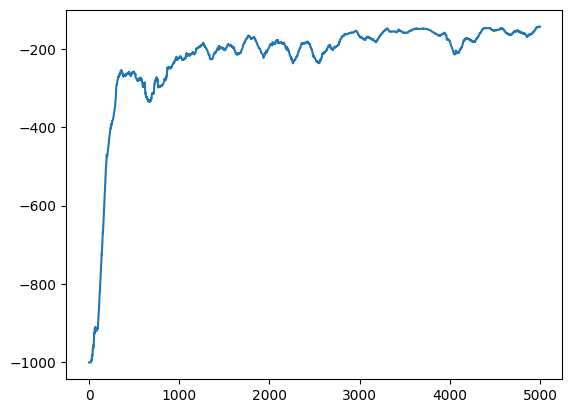

In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

env = gym.make("MountainCar-v0", render_mode="rgb_array")

pos_space = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=20)
vel_space = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=20)

q_vals = np.zeros((len(pos_space), len(vel_space), env.action_space.n))

num_episodes = 5000
eps_init = 0.1
eps = eps_init
eps_decay = 2 / num_episodes

learning_rate = 0.1
discount_factor = 0.9

rewards_per_episode = []

for episode in range(num_episodes):
    terminated = False
    observation, info = env.reset()
    sum_of_rewards = 0
    while not terminated and sum_of_rewards > -1000:
        pos_idx = np.digitize(observation[0], pos_space)
        vel_idx = np.digitize(observation[1], vel_space)

        if np.random.rand() < eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_vals[pos_idx, vel_idx, :])

        next_observation, reward, terminated, _, _ = env.step(action)
        next_pos_idx = np.digitize(next_observation[0], pos_space)
        next_vel_idx = np.digitize(next_observation[1], vel_space)

        if terminated:
            target = reward
        else:
            target = reward + discount_factor * np.max(q_vals[next_pos_idx, next_vel_idx, :])

        error = target - q_vals[pos_idx, vel_idx, action]
        q_vals[pos_idx, vel_idx, action] += learning_rate * error

        observation = next_observation
        sum_of_rewards += reward

    rewards_per_episode.append(sum_of_rewards)
    print("Episode:", episode, "Reward:", sum_of_rewards, "Epsilon:", eps)
    eps = eps_init * (1 - eps_decay * episode)

mean_rewards = np.zeros(num_episodes)
for t in range(num_episodes):
    mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):(t+1)])

plt.plot(mean_rewards)
plt.show()